<a href="https://colab.research.google.com/github/omarreess/Marketplace-Sales-Analysis/blob/main/Marketplace%20Sales%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> <center> Marketplace Sales Analysis 

___

<h2> OBJECTIVE

- Exploring & Cleaning the data 

- Handle Missing values 

- Checking is tha data inconsistency 

- Getting the Top 20 Products by Sales Count 

- Visualize The Top Products 

<h3> DATASET REFRENCE

www.kaggle.com/datasets/rohitsahoo/sales-forecasting

___

<h4> IMPORTING IMPORTANT PYTHON LIBRARIES

In [6]:
# Data Manipulation
import pandas as pd

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

print("Libraries are imported")
 

Libraries are imported


<h4> IMPORTING THE DATASET IN CSV FORMAT

In [7]:
# Importing dataset
sales_data = pd.read_csv('/content/market_sales.csv')

# Checking a small snap of data
sales_data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,US,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,US,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


<H3> EXPLORIING & CLEANING THE DATA 

In [8]:
# Checking Data shape
print(f"Data Shape -> {sales_data.shape} \n")

# Exploring an Overview for datatypes , entries count
sales_data.info()


Data Shape -> (9657, 18) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9657 entries, 0 to 9656
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9657 non-null   int64  
 1   Order ID       9657 non-null   object 
 2   Order Date     9657 non-null   object 
 3   Ship Date      9657 non-null   object 
 4   Ship Mode      9657 non-null   object 
 5   Customer ID    9657 non-null   object 
 6   Customer Name  9656 non-null   object 
 7   Segment        9656 non-null   object 
 8   Country        9656 non-null   object 
 9   City           9656 non-null   object 
 10  State          9656 non-null   object 
 11  Postal Code    9646 non-null   float64
 12  Region         9656 non-null   object 
 13  Product ID     9656 non-null   object 
 14  Category       9656 non-null   object 
 15  Sub-Category   9656 non-null   object 
 16  Product Name   9656 non-null   object 
 17  Sales          9656 non-n

Solving The inconsistency of Data 

In [9]:
# From Quick perview of the data , we observed inconstent entries in Country Column 
# Checking All unique values for this column 
sales_data['Country'].unique()

# Unify the values to be same , in same reference of data
sales_data['Country'].replace('US' ,'United States'  , inplace=True )
 

Checking Missing entries 

In [10]:
# Checking Overall missing entries 
sales_data.isna().sum()


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     1
Segment           1
Country           1
City              1
State             1
Postal Code      11
Region            1
Product ID        1
Category          1
Sub-Category      1
Product Name      1
Sales             1
dtype: int64

Cleaning Missing Entries in Postal code 

 



In [11]:
# Droping Missing rows in same ref of Data
sales_data.dropna(inplace=True)


<h2> MAKING SOME ANALYTICS 

In [12]:
# Checking a Quick Data Statistical Summary 
sales_data.describe()


,Row ID,Postal Code,Sales
count,9646.000000,9646.000000,9646.000000
mean,4825.076612,55255.863881,230.293199
std,2786.024295,32011.936849,628.026058
min,1.000000,1040.000000,0.444000
25%,2413.250000,23223.000000,17.302500
50%,4824.500000,57252.000000,54.376000
75%,7236.750000,90004.000000,209.940000
max,9656.000000,99301.000000,22638.480000


<h3> EXPLORATORY DATA ANALYSIS

 <h3> Getting the Top 20 Products by Sales Count 

In [13]:
# Classify products by sales count
top_products = pd.DataFrame(sales_data.groupby('Product Name').sum()['Sales']  )
 
# Getting Top Products in sorted way
top_products.sort_values(by=['Sales'], inplace=True ,ascending=False )

# Top 20 products in raw form
top_products[:20]


,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.8240
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.3840
Cisco TelePresence System EX90 Videoconferencing Unit,22638.4800
HON 5400 Series Task Chairs for Big and Tall,21870.5760
GBC Ibimaster 500 Manual ProClick Binding System,19024.5000
GBC DocuBind TL300 Electric Binding System,18926.4890
Hewlett Packard LaserJet 3310 Copier,18839.6860
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.8950
High Speed Automatic Electric Letter Opener,17030.3120


<h3> Visualize Top 20 Products 




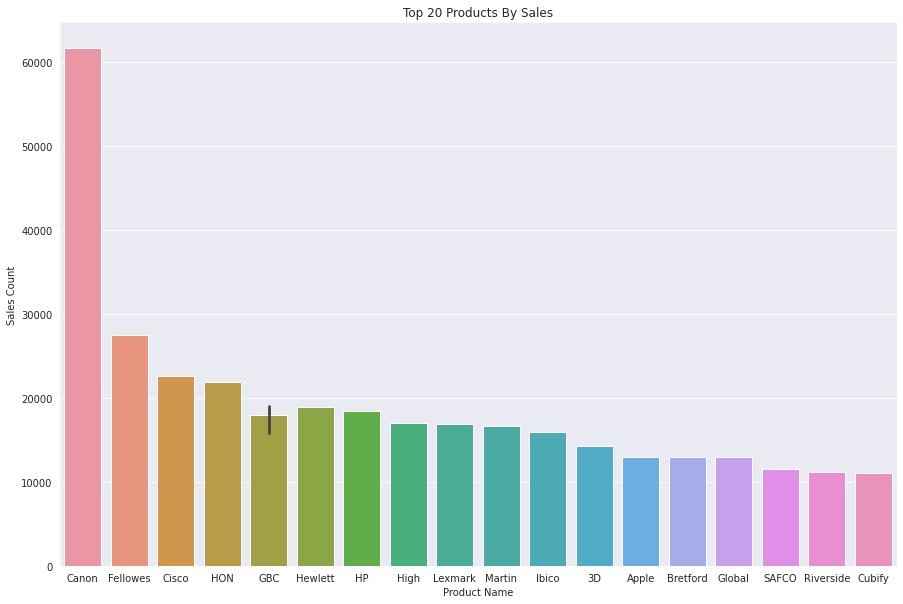

In [28]:
# Ploting Top 20 Products in Bar Chart 

# show only first name for product
product_name_list = pd.Series( top_products.index[:20]).apply(lambda x: x.split()[0].strip())
product_sales_list = top_products['Sales'][:20].tolist()

fig = plt.figure()
fig .set_figwidth(15) 
fig .set_figheight(10)
sns.set_style('darkgrid')


plt.title('Top 20 Products By Sales')
plt.xlabel('Products')
plt.ylabel('Sales Count')

sns.barplot(x = product_name_list,y= product_sales_list  , )
plt.show()

